# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

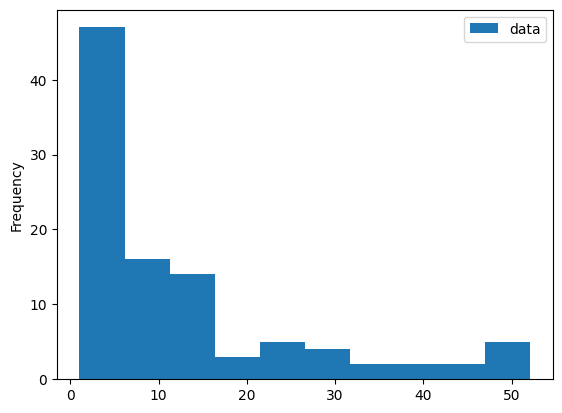

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

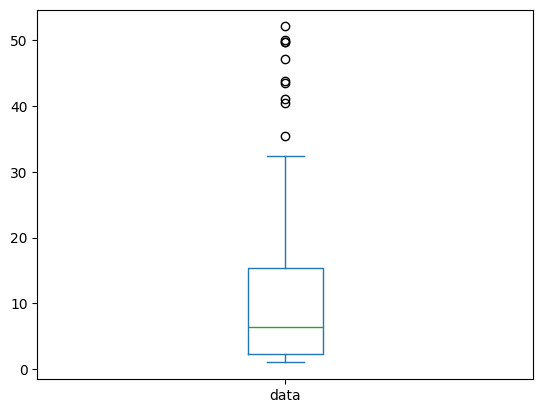

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [17]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Read the CSV file
df = pd.read_csv('HW4_Energy_USA.csv')

# Display the table
print(df.to_string(index=False, float_format=lambda x: '{:.1f}'.format(x)))

         State Coal_Millionshrttons Natural_Gas_BillionCBF Petroleum_Millionbarrels  Nuclear_Electric_Billionkwzhr  Hydro_Electric_Billionkwzhr  Wind_Billionkwzhr  Fuel_Ethanol_MIllionBarrel  BioDiesel_MillionBarrel
       Alabama                 15.9                  763.6                    115.3                           42.3                         10.2                0.0                         7.9                      0.6
        Alaska                  1.2                    445                     44.8                            0.0                          1.7                0.1                         0.0                      0.2
       Arizona                  8.4                    454                    120.2                           31.9                          5.3                1.6                         7.5                      0.4
      Arkansas                 12.1                  389.1                     63.9                           14.3                      

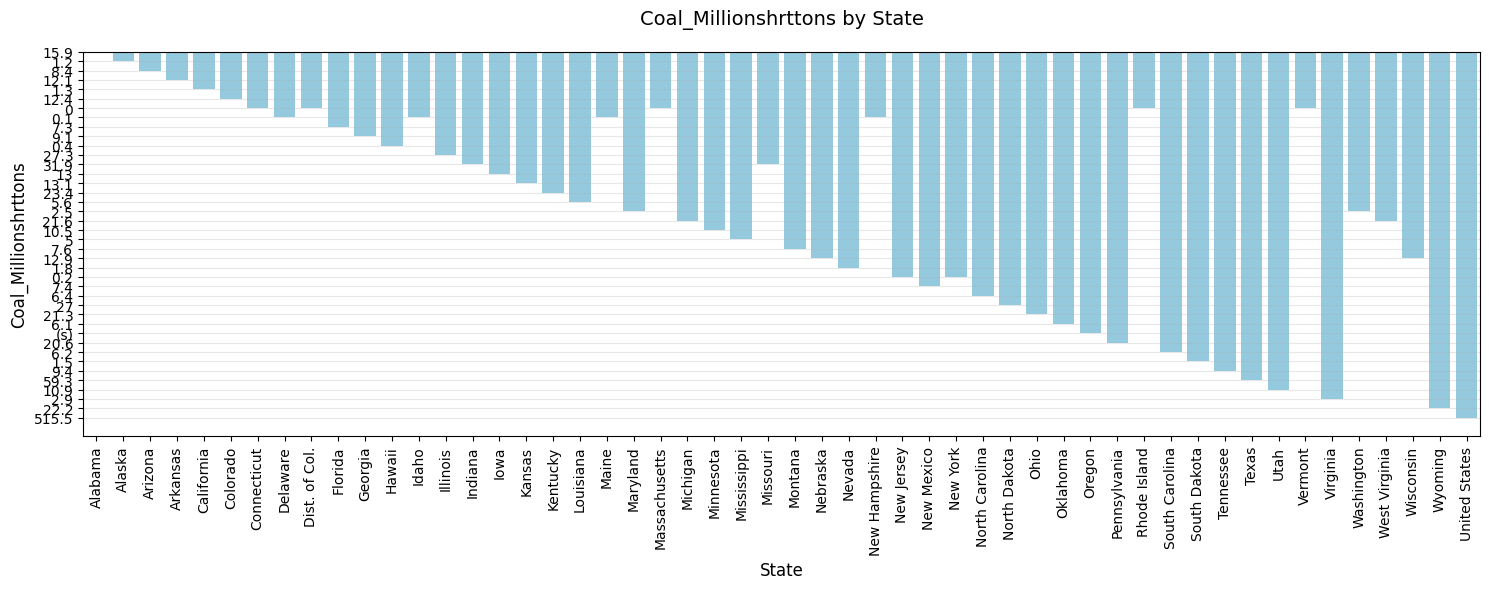

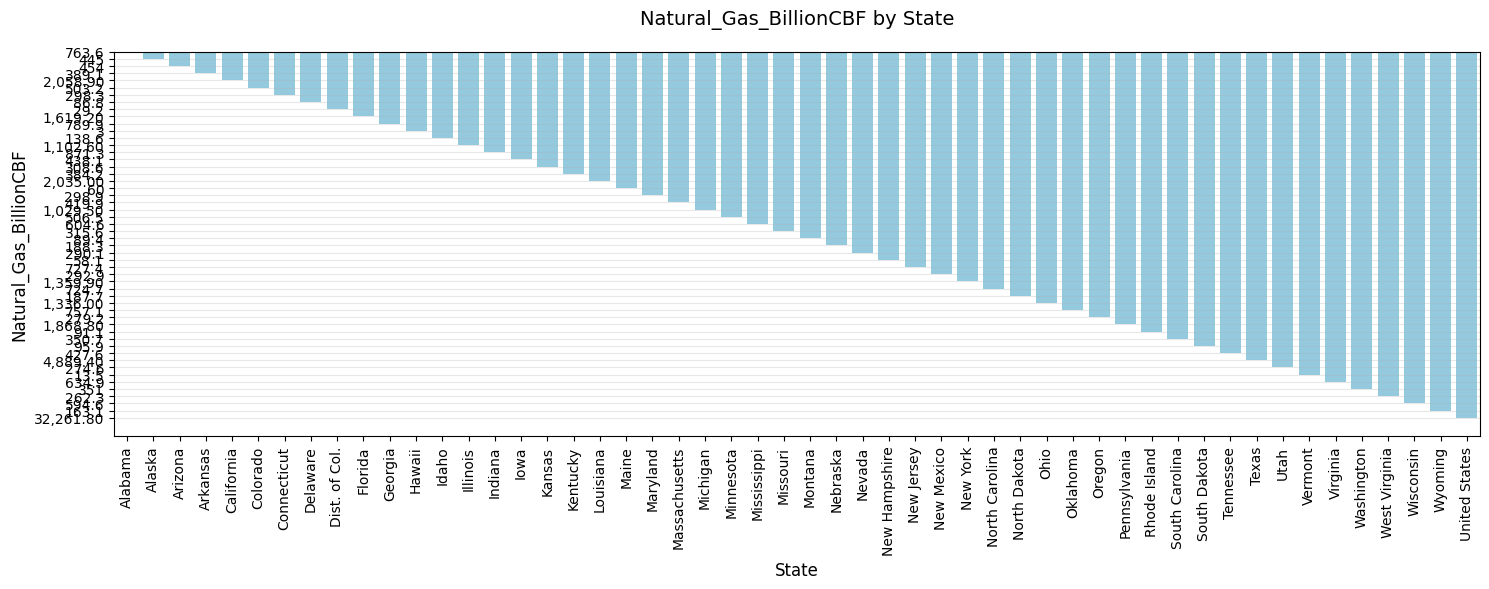

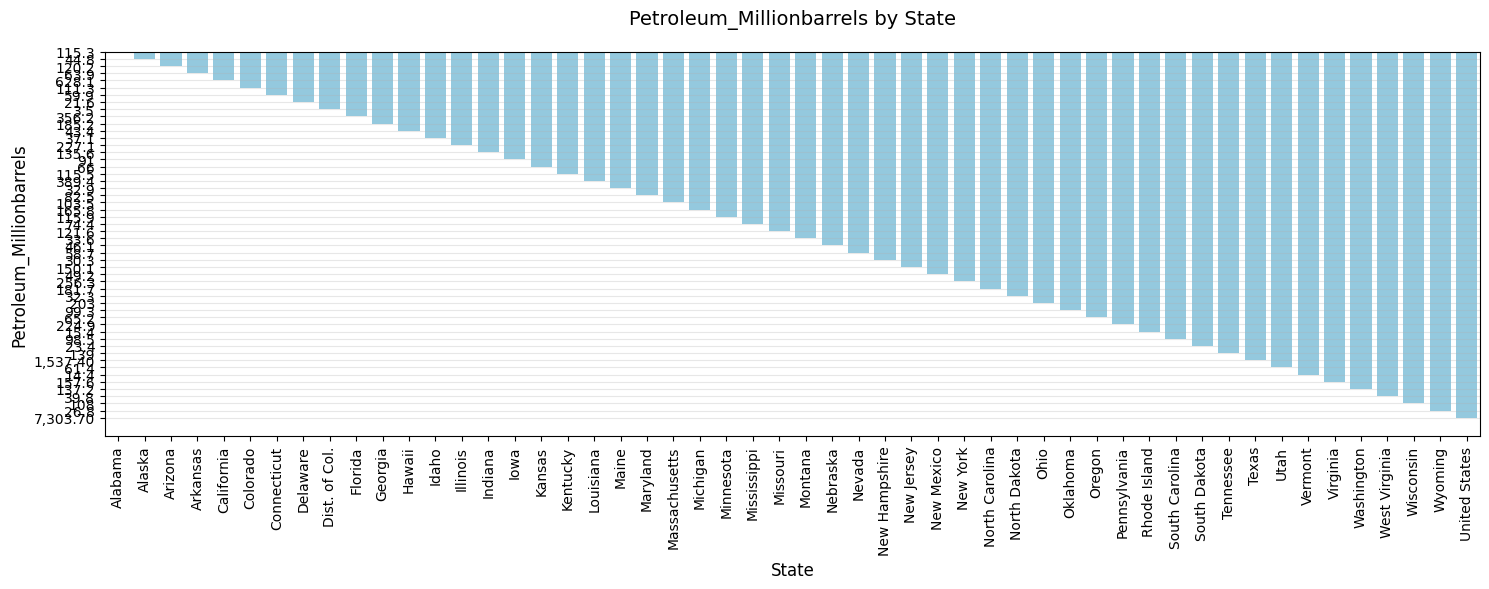

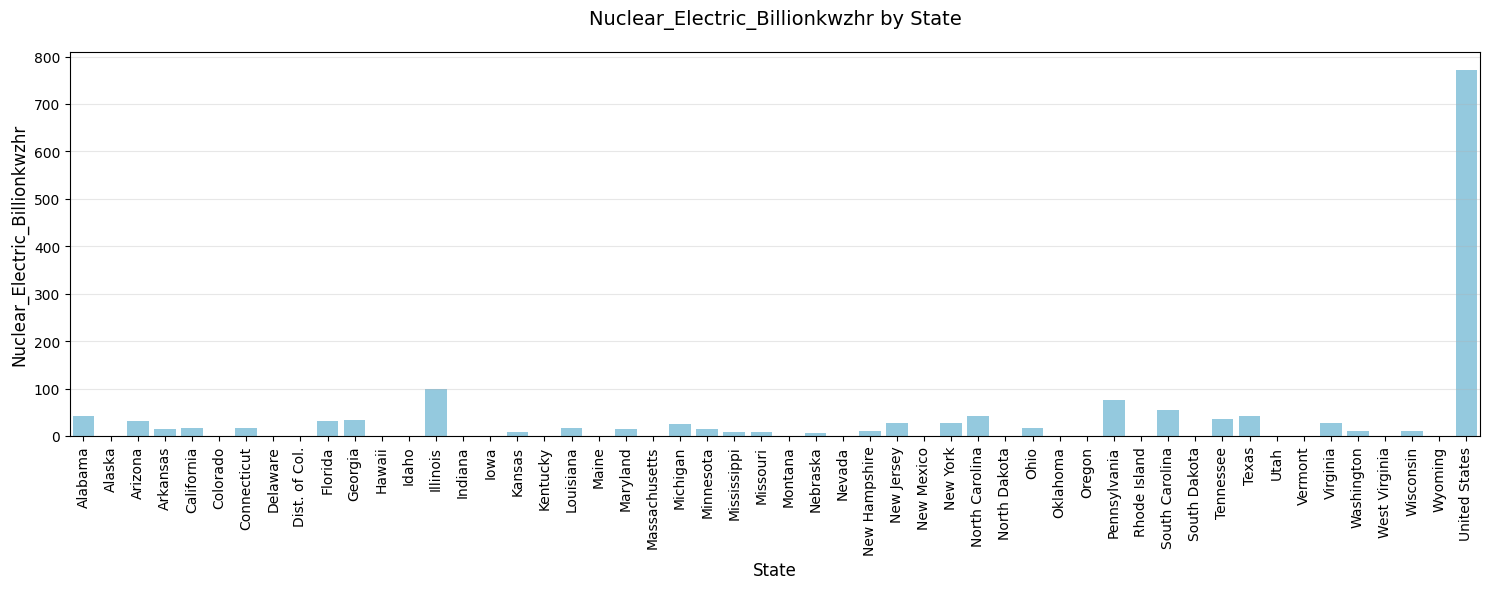

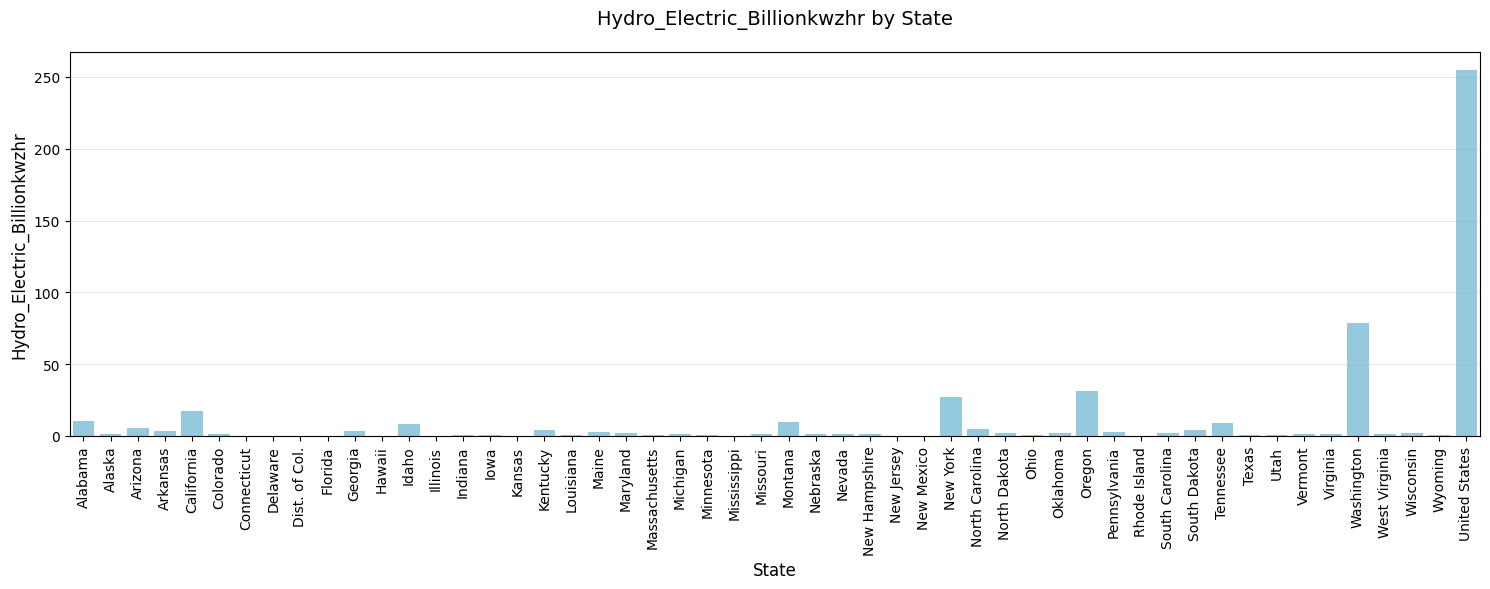

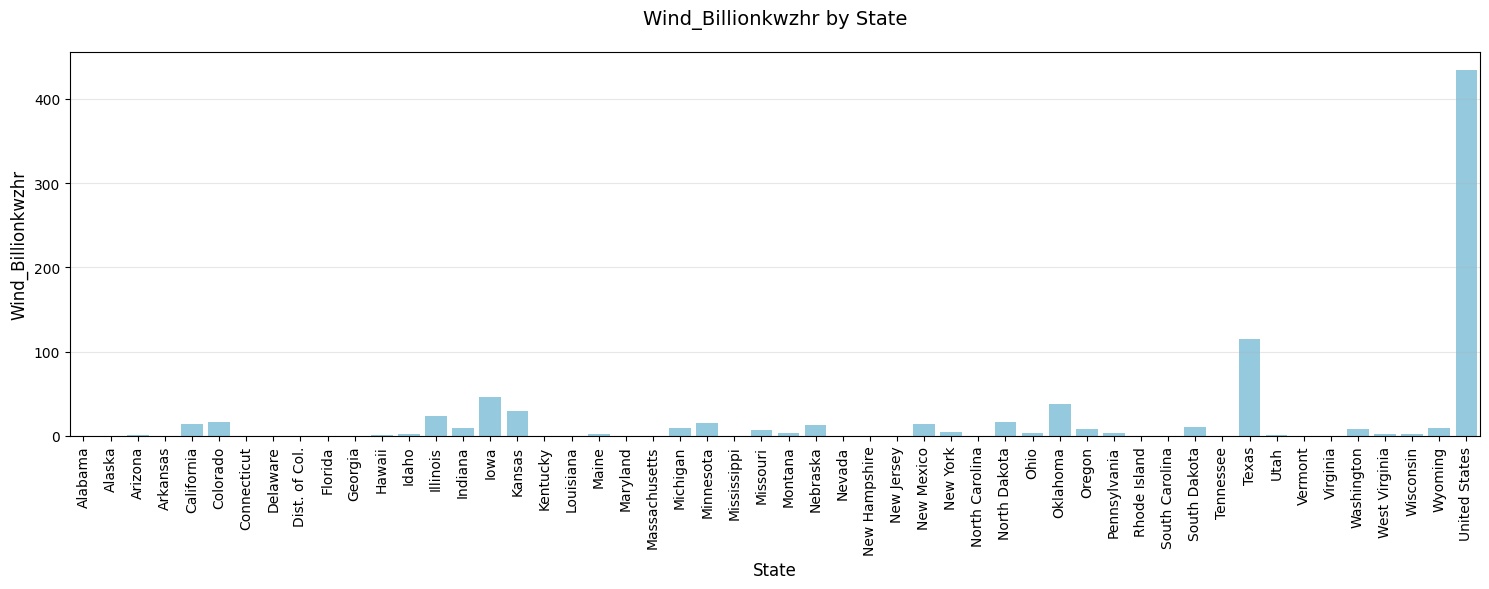

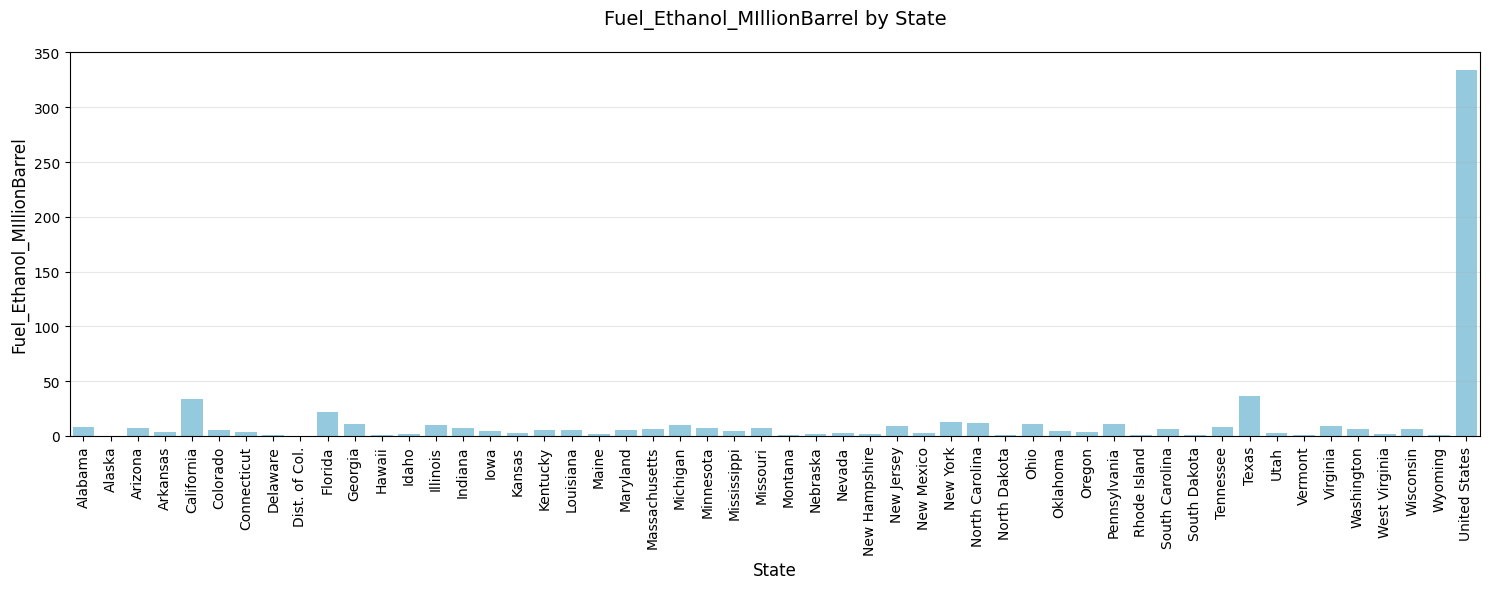

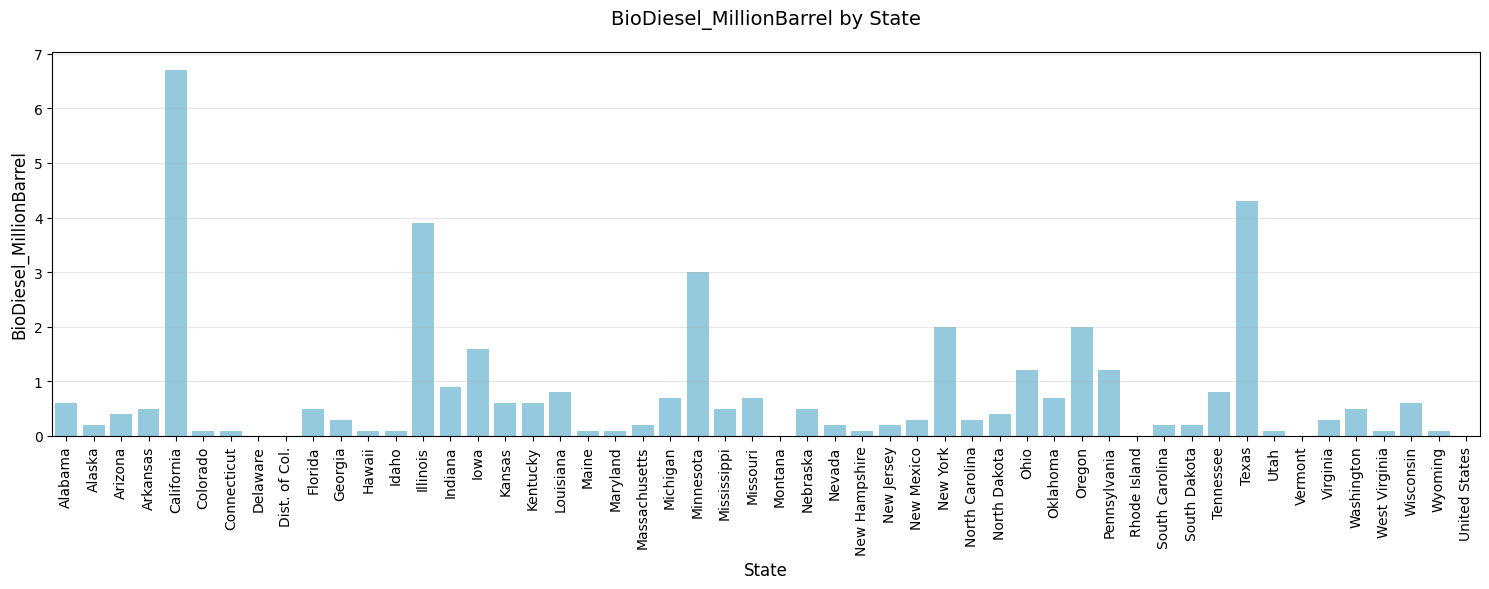

In [27]:
# Read the CSV file
df = pd.read_csv('HW4_Energy_USA.csv')

# Get numerical columns
numerical_cols = [col for col in df.columns if col != 'State']

# Create a separate histogram for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(15, 6))
    
    # Create histogram
    sns.barplot(
        data=df,
        x='State',
        y=col,
        color='skyblue'
    )
    
    # Customize the plot
    plt.title(f'{col} by State', pad=20, fontsize=14)
    plt.xticks(rotation=90)  # Rotate state labels for better readability
    plt.xlabel('State', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()

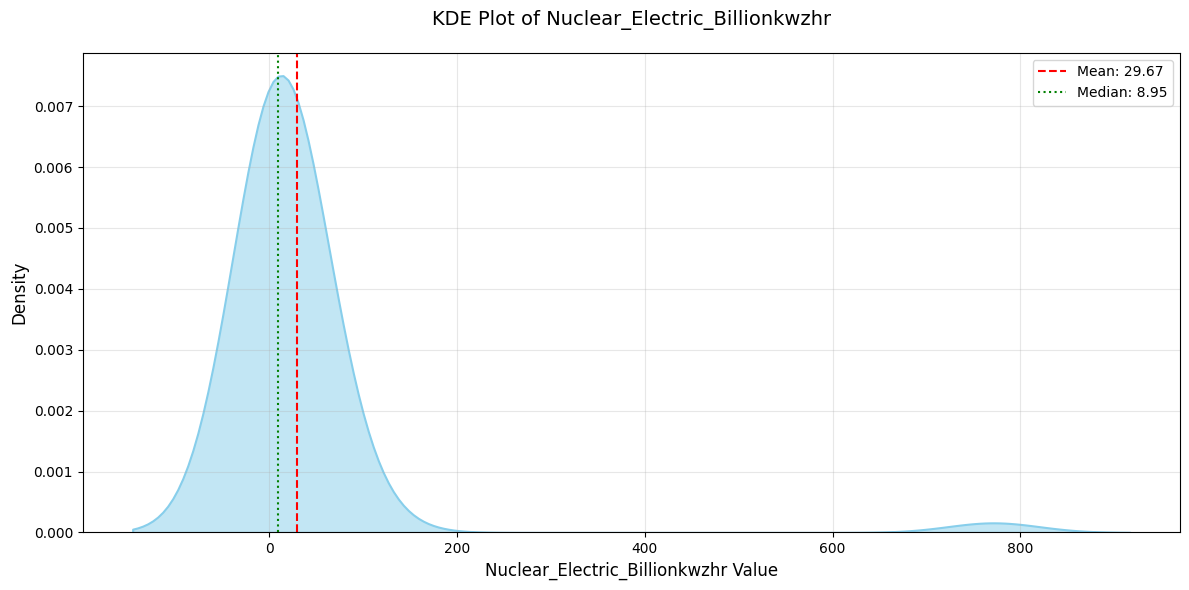

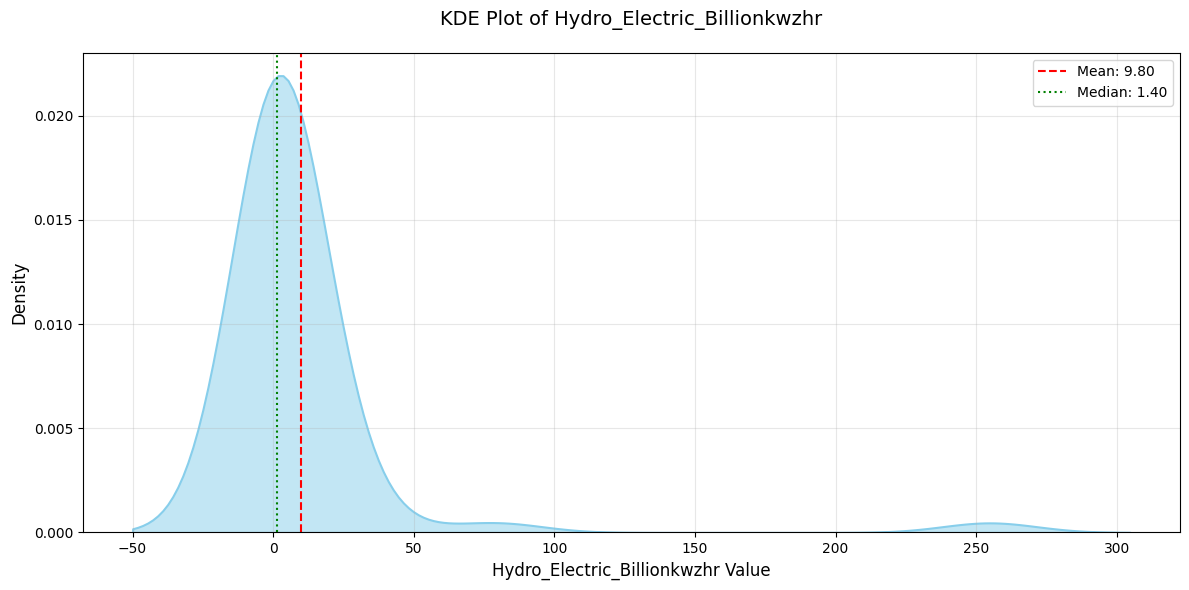

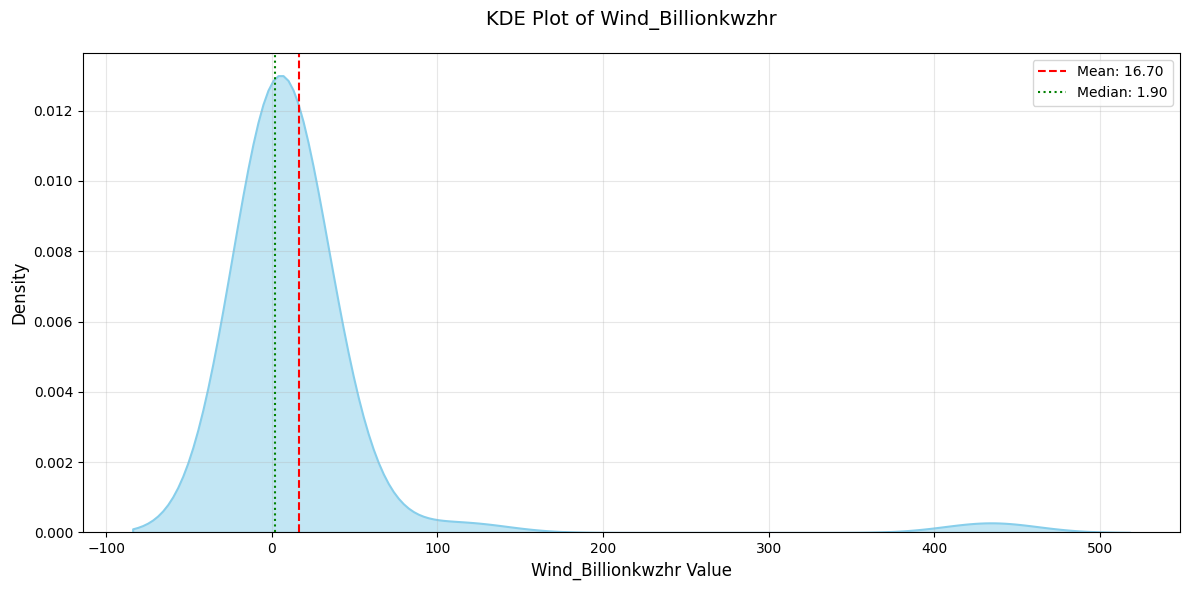

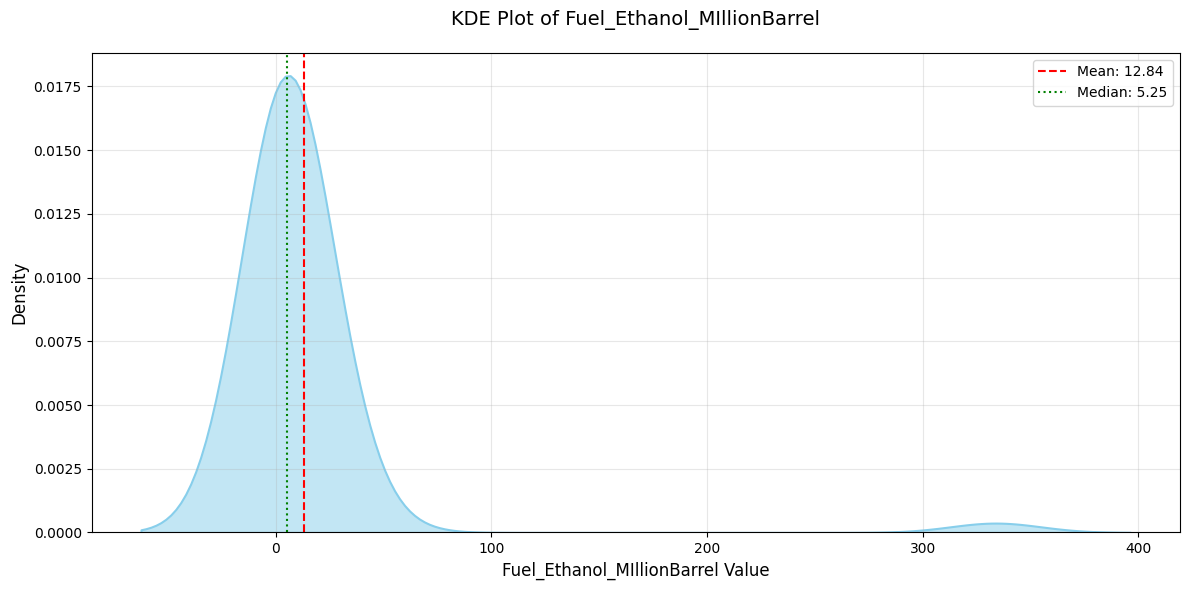

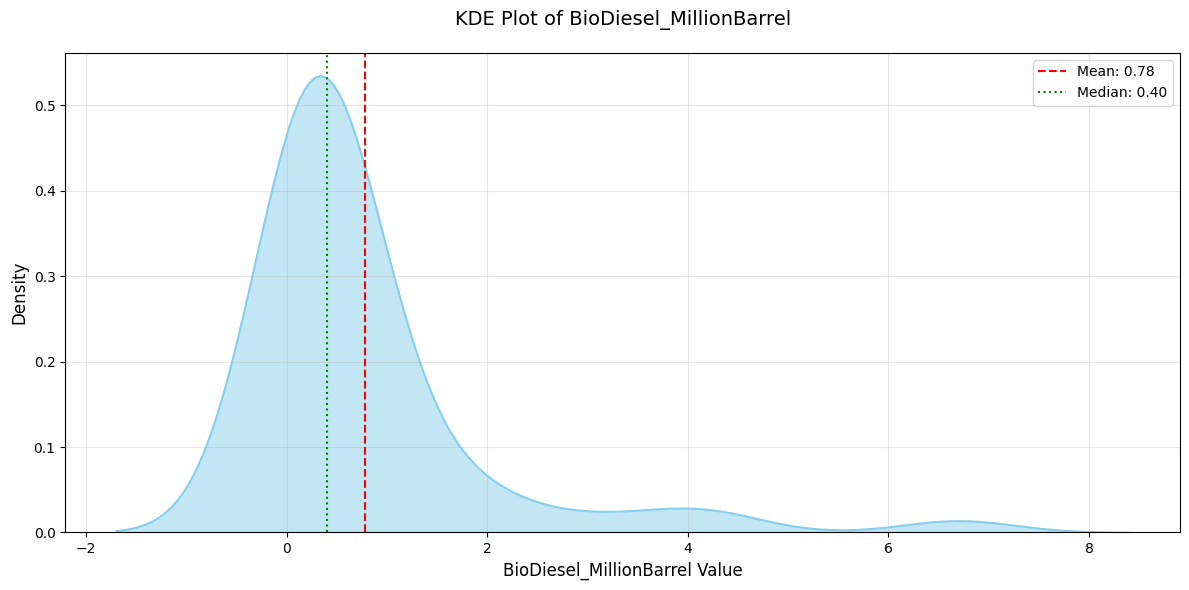

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('HW4_Energy_USA.csv')

# Get only the numerical columns (excluding 'State')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create individual KDE plots
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Create KDE plot
    sns.kdeplot(
        data=df[col],
        fill=True,
        alpha=0.5,
        linewidth=1.5,
        color='skyblue'
    )
    
    # Customize the plot
    plt.title(f'KDE Plot of {col}', pad=20, fontsize=14)
    plt.xlabel(f'{col} Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Add grid
    plt.grid(alpha=0.3)
    
    # Add mean and median lines
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle=':', label=f'Median: {df[col].median():.2f}')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

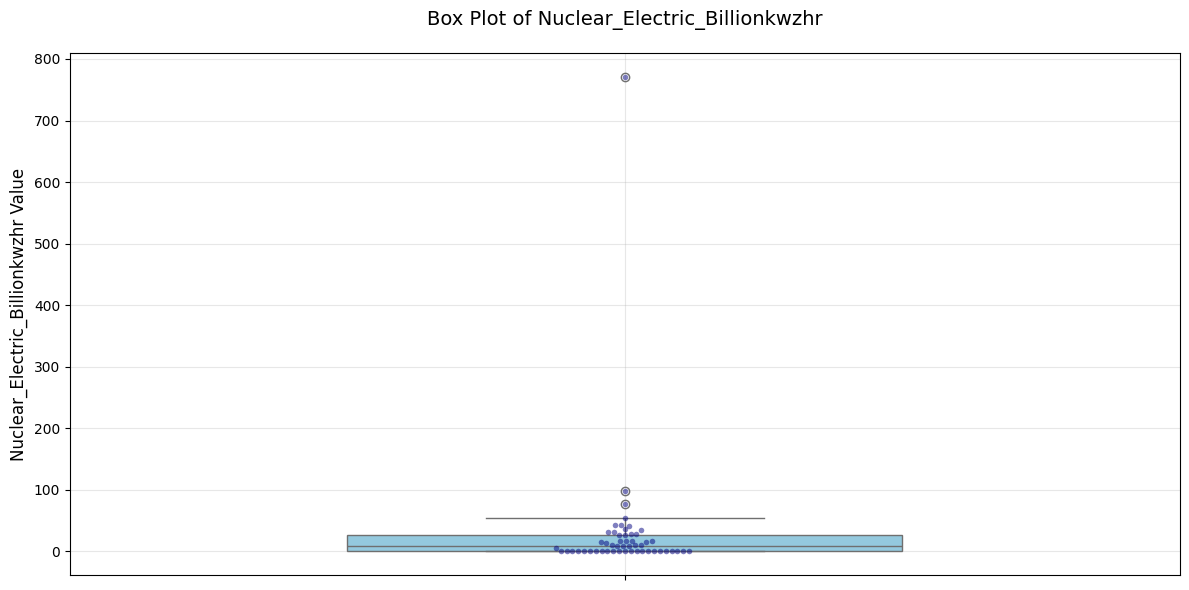

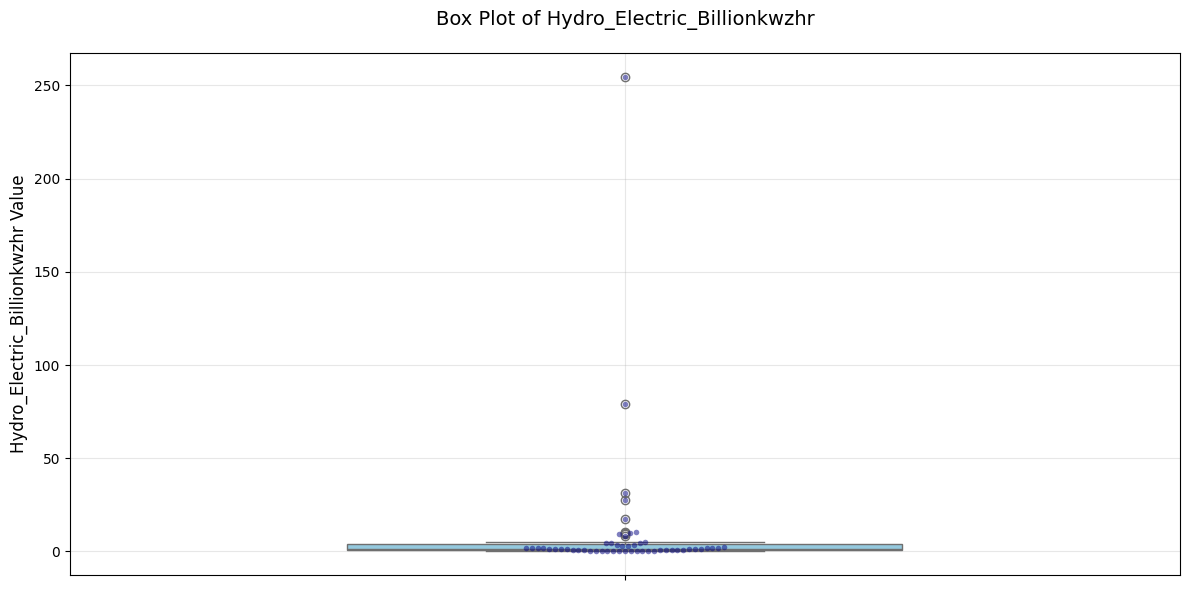

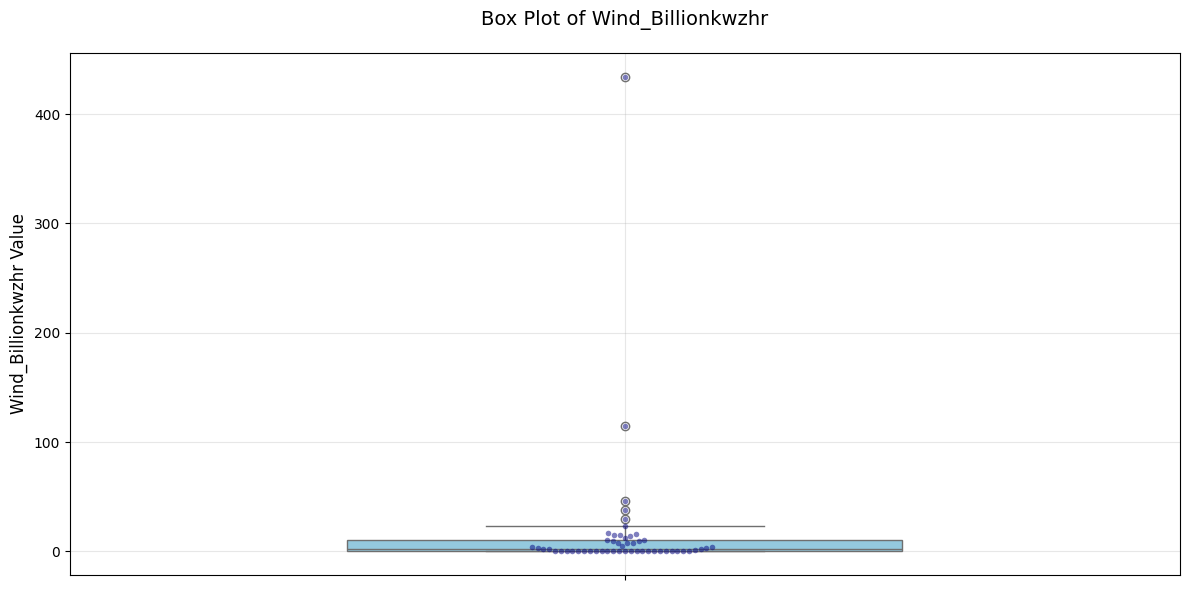

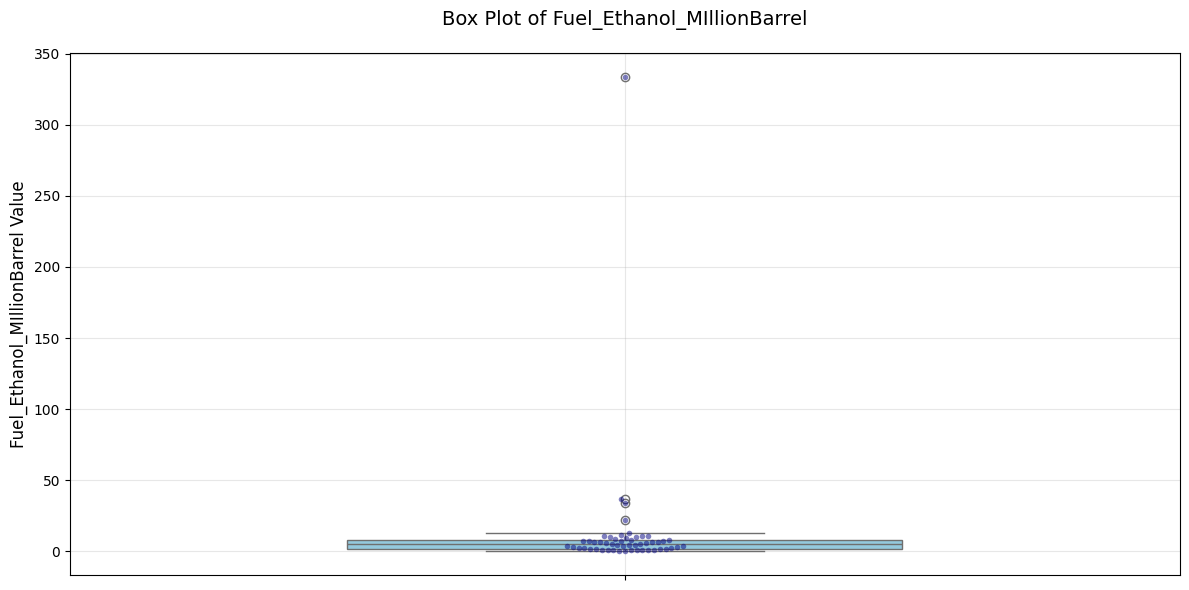

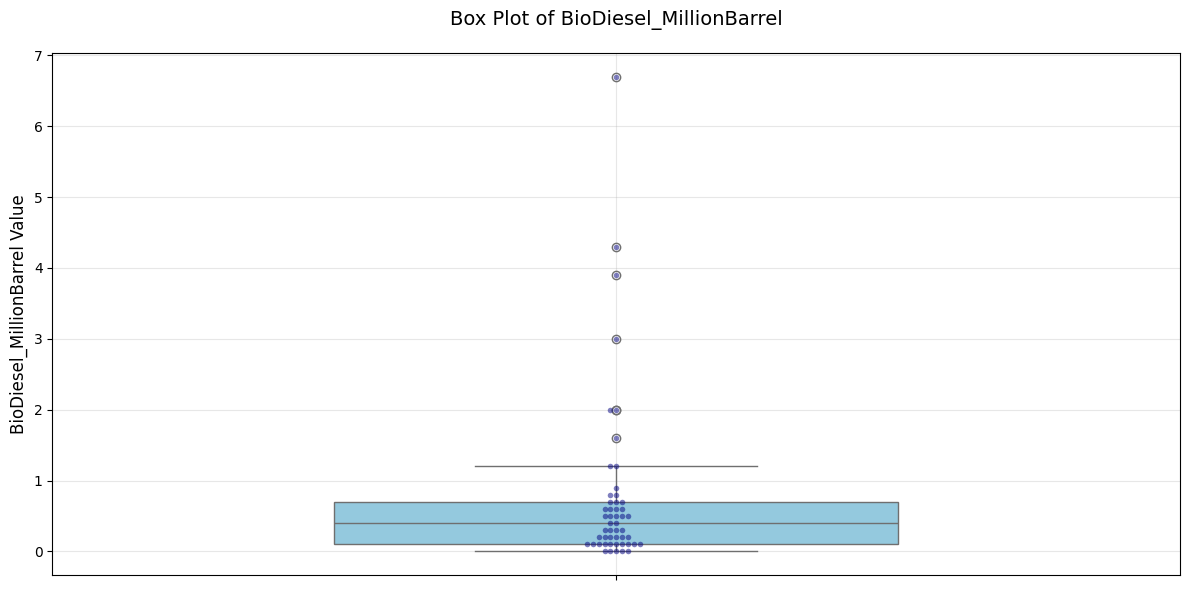

In [35]:
# Get numerical columns (excluding 'State')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create individual box plots
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Create box plot
    sns.boxplot(
        data=df,
        y=col,
        color='skyblue',
        width=0.5
    )
    
    # Add individual points
    sns.swarmplot(
        data=df,
        y=col,
        color='navy',
        alpha=0.5,
        size=4
    )
    
    # Customize the plot
    plt.title(f'Box Plot of {col}', pad=20, fontsize=14)
    plt.ylabel(f'{col} Value', fontsize=12)
    
    # Add grid
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

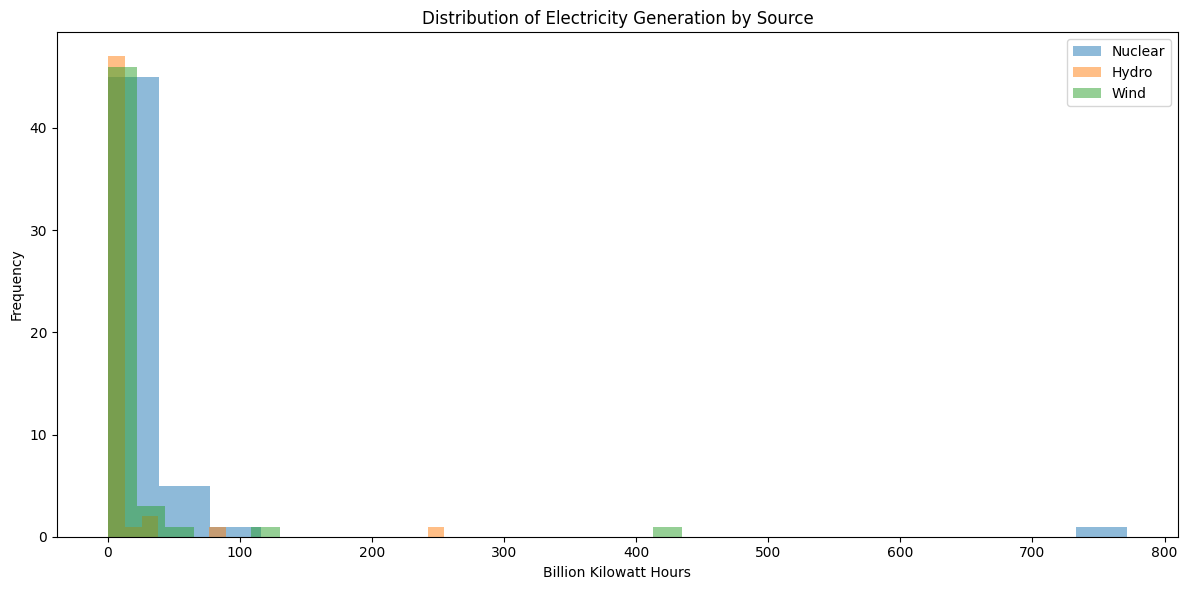

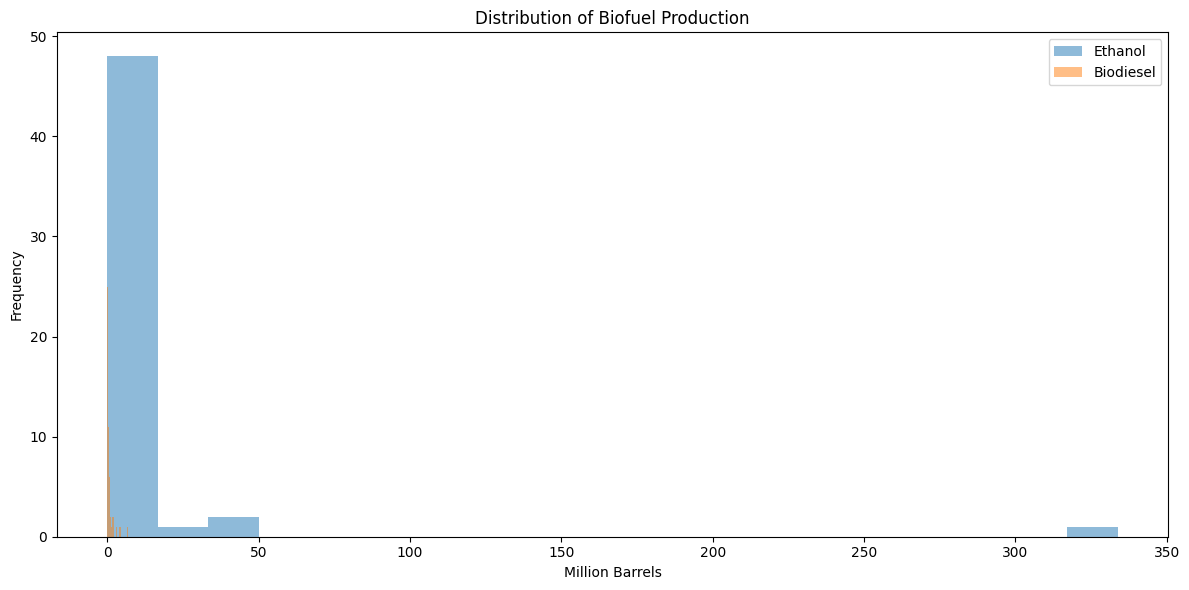

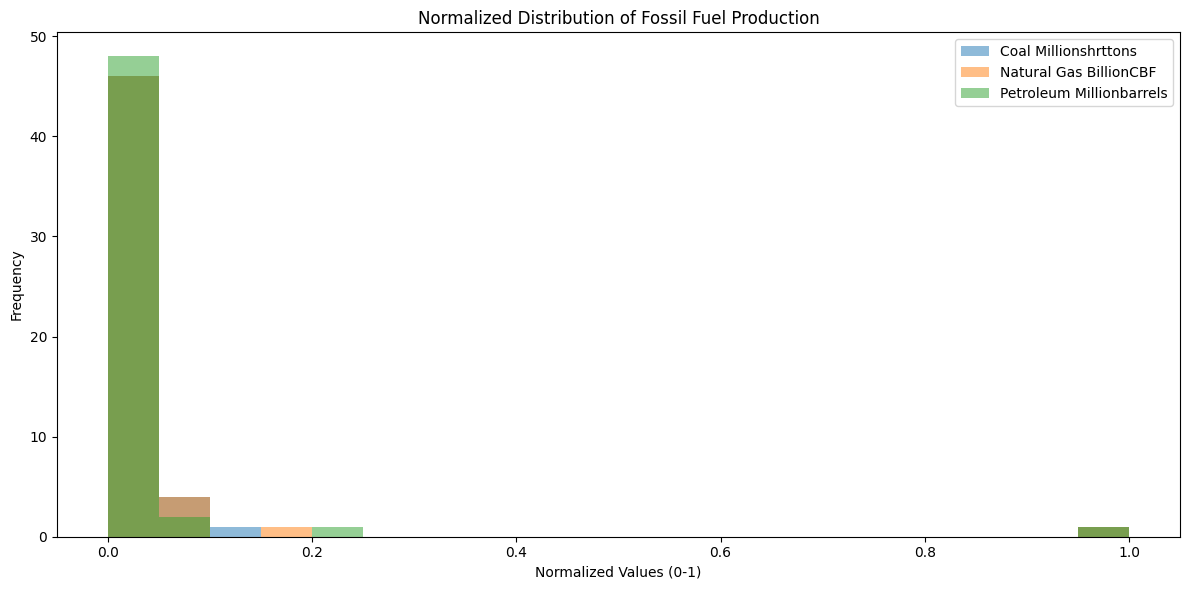

<Figure size 1500x1000 with 0 Axes>

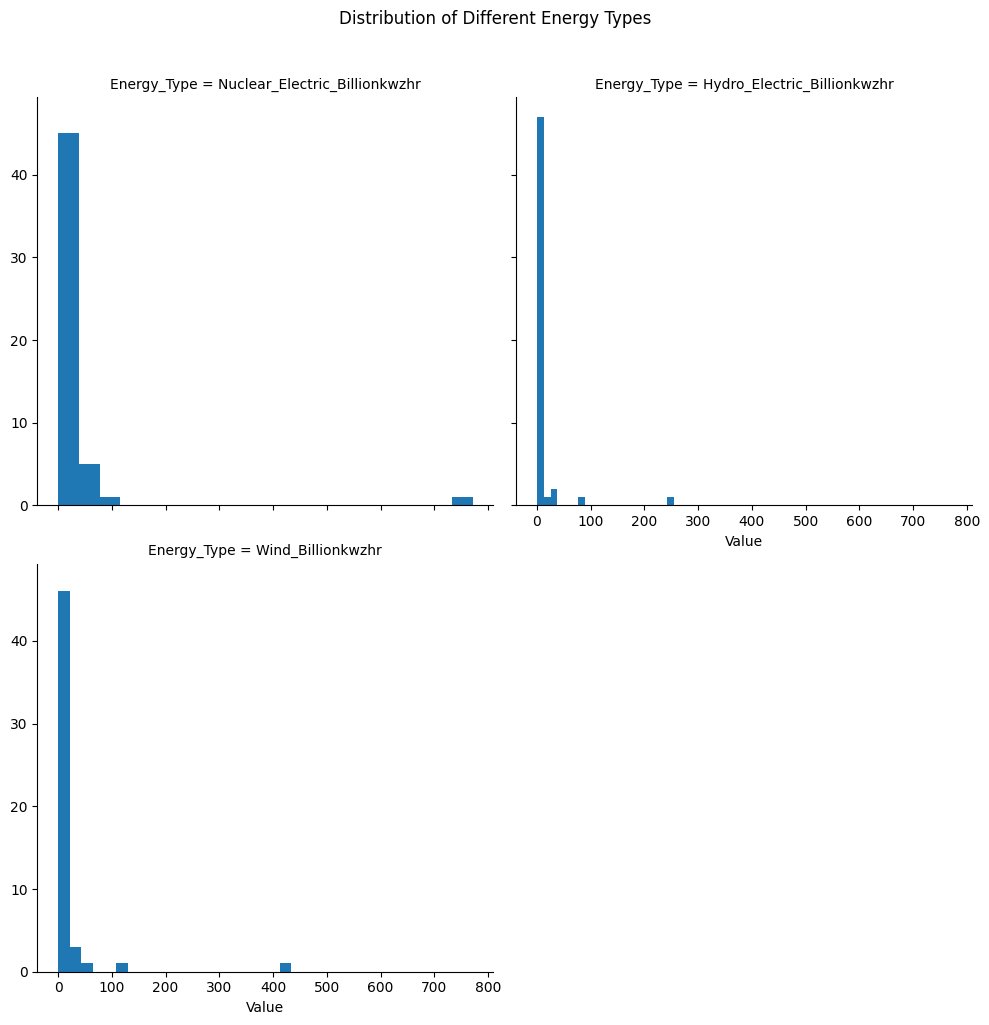

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the CSV file
df = pd.read_csv('HW4_Energy_USA.csv')

# Clean numeric data
def clean_numeric(x):
    if isinstance(x, str):
        # Handle '(s)' case
        if x == '(s)':
            return 0
        # Handle other string cases
        return float(x.replace(',', '').replace(' ', ''))
    return x

# Clean all numeric columns
for column in df.columns[1:]:  # Skip State column
    df[column] = df[column].apply(clean_numeric)

# 1. Nuclear vs Hydro vs Wind (all in Billion kWh)
plt.figure(figsize=(12, 6))
plt.hist(df['Nuclear_Electric_Billionkwzhr'], alpha=0.5, label='Nuclear', bins=20)
plt.hist(df['Hydro_Electric_Billionkwzhr'], alpha=0.5, label='Hydro', bins=20)
plt.hist(df['Wind_Billionkwzhr'], alpha=0.5, label='Wind', bins=20)
plt.xlabel('Billion Kilowatt Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity Generation by Source')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Biofuels comparison (both in Million Barrels)
plt.figure(figsize=(12, 6))
plt.hist(df['Fuel_Ethanol_MIllionBarrel'], alpha=0.5, label='Ethanol', bins=20)
plt.hist(df['BioDiesel_MillionBarrel'], alpha=0.5, label='Biodiesel', bins=20)
plt.xlabel('Million Barrels')
plt.ylabel('Frequency')
plt.title('Distribution of Biofuel Production')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Function for normalized comparison of different scale variables
def plot_normalized_histogram(df, columns, title, xlabel):
    plt.figure(figsize=(12, 6))
    for col in columns:
        # Normalize the data
        data = df[col]
        normalized_data = (data - data.min()) / (data.max() - data.min())
        plt.hist(normalized_data, alpha=0.5, label=col.replace('_', ' '), bins=20)
    
    plt.xlabel('Normalized Values (0-1)')
    plt.ylabel('Frequency')
    plt.title(f'Normalized Distribution of {title}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create normalized comparison of fossil fuels
fossil_fuel_columns = ['Coal_Millionshrttons', 'Natural_Gas_BillionCBF', 'Petroleum_Millionbarrels']
plot_normalized_histogram(df, fossil_fuel_columns, 'Fossil Fuel Production', 'Normalized Amount')

# Optional: Create a more sophisticated visualization using seaborn's FacetGrid
plt.figure(figsize=(15, 10))
energy_types = ['Nuclear_Electric_Billionkwzhr', 'Hydro_Electric_Billionkwzhr', 'Wind_Billionkwzhr']
melted_df = pd.melt(df, value_vars=energy_types, var_name='Energy_Type', value_name='Value')

# Create FacetGrid
g = sns.FacetGrid(melted_df, col='Energy_Type', col_wrap=2, height=5)
g.map(plt.hist, 'Value', bins=20)
g.fig.suptitle('Distribution of Different Energy Types', y=1.02)
plt.tight_layout()
plt.show()

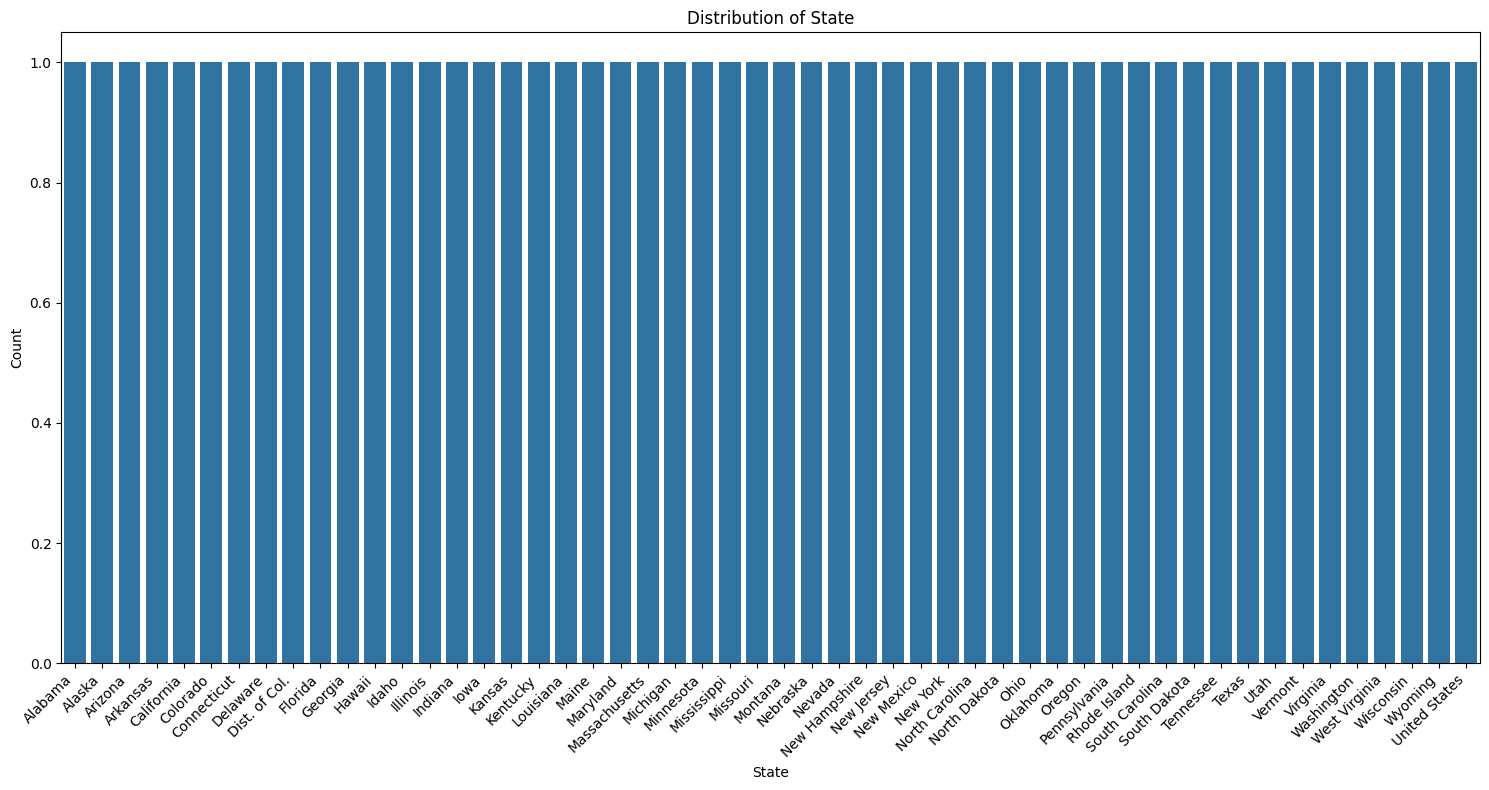

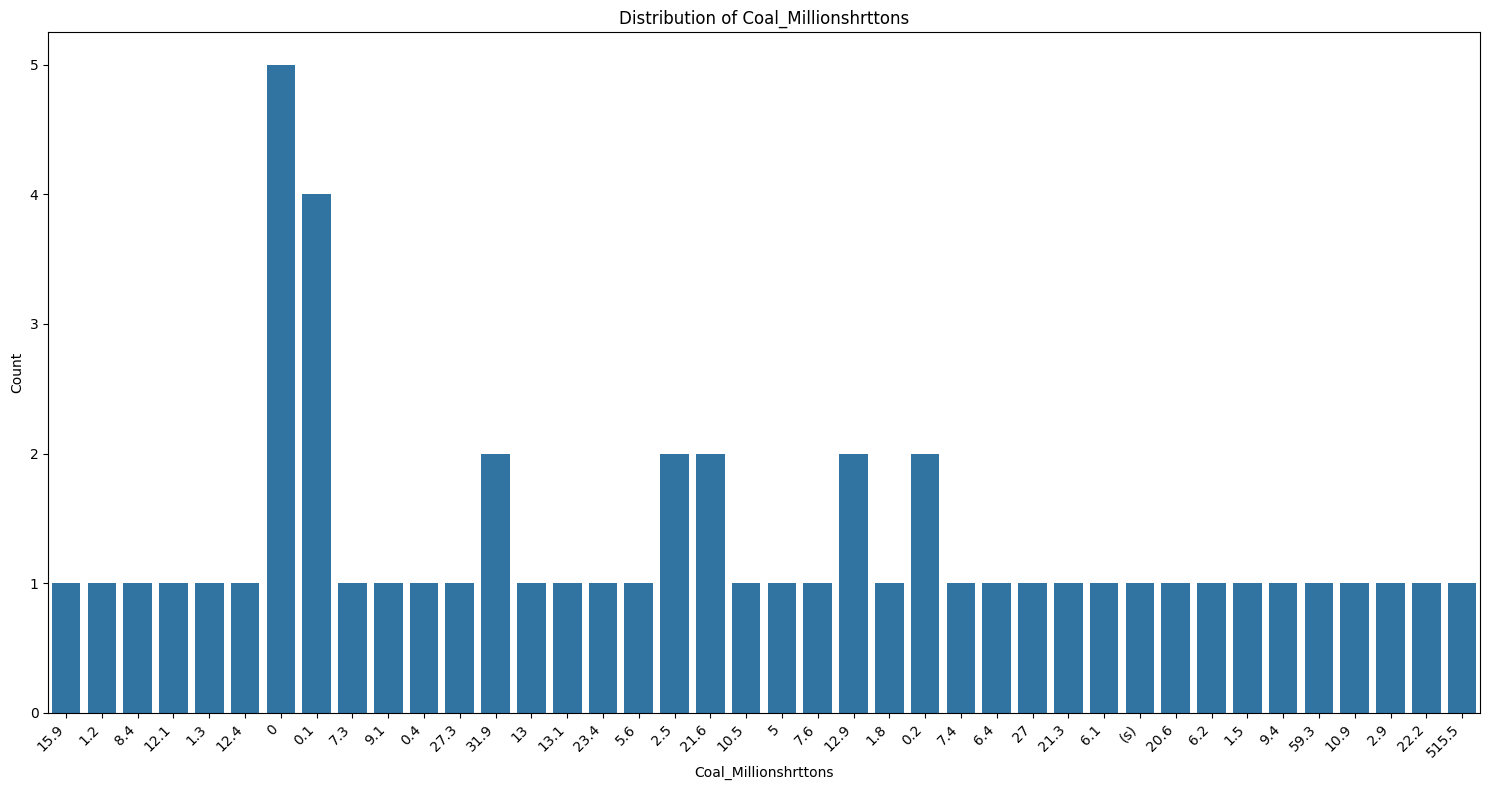

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_categorical_plot(df, column_name, bins=10):
    plt.figure(figsize=(15, 8))
    
    if df[column_name].dtype in ['int64', 'float64']:
        # For numeric columns, create bins
        df[f'{column_name}_binned'] = pd.cut(df[column_name], bins=bins)
        sns.countplot(data=df, x=f'{column_name}_binned')
        plt.xlabel(f'{column_name} (Binned)')
    else:
        # For categorical columns
        sns.countplot(data=df, x=column_name)
        plt.xlabel(column_name)
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.tight_layout()
    plt.show()

# Example usage:
df = pd.read_csv('HW4_Energy_USA.csv')

# For categorical data (like State)
create_categorical_plot(df, 'State')

# For numeric data (will create bins automatically)
create_categorical_plot(df, 'Coal_Millionshrttons')

In [40]:
import pandas as pd
import numpy as np
from scipy import stats

# Read the CSV file
df = pd.read_csv('HW4_Energy_USA.csv')

# Function to clean numeric strings
def clean_numeric(x):
    if isinstance(x, str):
        # Remove any commas and spaces
        x = x.replace(',', '').replace(' ', '')
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

# Clean and convert all numeric columns
numeric_columns = df.columns[1:]  # Skip the 'State' column
for column in numeric_columns:
    df[column] = df[column].apply(clean_numeric)

# Initialize dictionaries to store the statistics
means = {}
medians = {}
modes = {}

# Calculate statistics for each column
for column in numeric_columns:
    # Calculate mean
    means[column] = df[column].mean()
    
    # Calculate median
    medians[column] = df[column].median()
    
    # Calculate mode using pandas mode() instead of scipy
    mode_result = df[column].mode()
    modes[column] = mode_result.iloc[0] if not mode_result.empty else np.nan

# Print the results in a formatted way
print("Statistical Analysis of Energy Data\n")
print("=" * 50)

for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Mean: {means[column]:.2f}")
    print(f"Median: {medians[column]:.2f}")
    print(f"Mode: {modes[column]:.2f}")

Statistical Analysis of Energy Data


Coal_Millionshrttons:
Mean: 20.21
Median: 7.40
Mode: 0.00

Natural_Gas_BillionCBF:
Mean: 1240.84
Median: 404.50
Mode: 3.00

Petroleum_Millionbarrels:
Mean: 280.87
Median: 98.90
Mode: 3.50

Nuclear_Electric_Billionkwzhr:
Mean: 29.67
Median: 8.95
Mode: 0.00

Hydro_Electric_Billionkwzhr:
Mean: 9.80
Median: 1.40
Mode: 0.00

Wind_Billionkwzhr:
Mean: 16.70
Median: 1.90
Mode: 0.00

Fuel_Ethanol_MIllionBarrel:
Mean: 12.84
Median: 5.25
Mode: 1.20

BioDiesel_MillionBarrel:
Mean: 0.78
Median: 0.40
Mode: 0.10


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.